In [8]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty
sensei
/opt/jupyterhub/bin/python3
3.8.5 (default, Jul 28 2020, 12:59:40) 
[GCC 9.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


## Full name: 
## R#: 
## HEX: 
## Title of the notebook
## Date: 

# Lab9: Simulation

#### Example1: Simulate a game of Russian Roulette:
- For 2 rounds
- For 5 rounds
- For 10 rounds

In [9]:
import numpy as np                     #import numpy
revolver = np.array([1,0,0,0,0,0])     #create a numpy array with 1 bullet and 5 empty chambers
print(np.random.choice(revolver,2))              #randomly select a value from revolver - simulation

[0 0]


In [10]:
print(np.random.choice(revolver,5))

[0 0 0 1 1]


In [11]:
print(np.random.choice(revolver,10))

[0 0 0 0 0 0 0 0 0 0]


#### Exercise 1: Simulate the results of throwing a D6 (regular dice) for 10 times. 

#### Example2: Assume the following rules:

- If the dice shows 1 or 2 spots, my net gain is -1 dollar.

- If the dice shows 3 or 4 spots, my net gain is 0 dollars.

- If the dice shows 5 or 6 spots, my net gain is 1 dollar.

__Define a function to simulate a game with the above rules, assuming a D6, and compute the net gain of the player over any given number of rolls. <br>
Compute the net gain for 5, 50, and 500 rolls__

In [12]:
def D6game(nrolls):
    import numpy as np                     #import numpy
    dice = np.array([1,2,3,4,5,6])         #create a numpy array with values of a D6
    rolls = np.random.choice(dice,nrolls)  #randomly selecting a value from dice for nrolls times- simulation
    gainlist =[]                           #create an empty list for gains|losses
    for i in np.arange(len(rolls)):        #Apply the rules 
        if rolls[i]<=2:
            gainlist.append(-1)
        elif rolls[i]<=4:
            gainlist.append(0)
        elif rolls[i]<=6:
            gainlist.append(+1)
    return (np.sum(gainlist))              #sum up all gains|losses
#   return (gainlist,"The net gain is equal to:",np.sum(gainlist))


In [13]:
D6game(5)

-2

In [14]:
D6game(50)

-4

In [15]:
D6game(500)

-16

#### Exercise2: Assume the following rules:

- If the dice shows 1 or 2 spots, my net gain is (-2*value of dice) dollars.

- If the dice shows 3 or 4 spots, my net gain is 1 dollars.

- If the dice shows 5 spots, my net gain is (2*value of dice) dollars.

- If the dice shows 6 spots, my net gain is -5 dollars.


__Define a function to simulate a game with the above rules, assuming a D6, and compute the net gain of the player over any given number of rolls. <br>
Compute the net gain for 5, 50, and 500 rolls__

In [16]:
# Define the function

In [17]:
# Run for 5 rounds

In [18]:
# Run for 50 rounds

In [19]:
# Run for 500 rounds

#### Example3: Simulate Monty Hall Game for 1000 times. Use a barplot and discuss whether players are better off sticking to their initial choice, or switching doors? 

In [20]:
def othergoat(x):         #Define a function to return "the other goat"!
    if x == "Goat 1":
        return "Goat 2"
    elif x == "Goat 2":
        return "Goat 1"

In [21]:
Doors = np.array(["Car","Goat 1","Goat 2"])     #Define a list for objects behind the doors
goats = np.array(["Goat 1" , "Goat 2"])          #Define a list for goats!

def MHgame():
    #Function to simulate the Monty Hall Game
    #For each guess, return ["the guess","the revealed", "the remaining"]
    userguess=np.random.choice(Doors)         #randomly selects a door as userguess
    if userguess == "Goat 1":
        return [userguess, "Goat 2","Car"]
    if userguess == "Goat 2":
        return [userguess, "Goat 1","Car"]
    if userguess == "Car":
        revealed = np.random.choice(goats)
        return [userguess, revealed,othergoat(revealed)]

In [22]:
# Check and see if the MHgame function is doing what it is supposed to do:
for i in np.arange(1):
    a =MHgame()
    print(a)
    print(a[0])
    print(a[1])
    print(a[2])

['Goat 1', 'Goat 2', 'Car']
Goat 1
Goat 2
Car


In [23]:
c1 = []         #Create an empty list for the userguess
c2 = []         #Create an empty list for the revealed
c3 = []         #Create an empty list for the remaining
for i in np.arange(1000):         #Simulate the game for 1000 rounds - or any other number of rounds you desire
    game = MHgame()
    c1.append(game[0])             #In each round, add the first element to the userguess list
    c2.append(game[1])             #In each round, add the second element to the revealed list
    c3.append(game[2])             #In each round, add the third element to the remaining list


In [24]:
import pandas as pd
#Create a data frame (gamedf) with 3 columns ("Guess","Revealed", "Remaining") and 1000 (or how many number of rounds) rows
gamedf = pd.DataFrame({'Guess':c1,
                       'Revealed':c2,
                       'Remaining':c3})
gamedf

,Guess,Revealed,Remaining
0,Car,Goat 1,Goat 2
1,Car,Goat 2,Goat 1
2,Car,Goat 2,Goat 1
3,Goat 2,Goat 1,Car
4,Goat 2,Goat 1,Car
...,...,...,...
995,Car,Goat 2,Goat 1
996,Car,Goat 2,Goat 1
997,Goat 2,Goat 1,Car
998,Goat 2,Goat 1,Car


In [25]:
# Get the count of each item in the first and 3rd column
original_car =gamedf[gamedf.Guess == 'Car'].shape[0]
remaining_car =gamedf[gamedf.Remaining == 'Car'].shape[0]

original_g1 =gamedf[gamedf.Guess == 'Goat 1'].shape[0]
remaining_g1 =gamedf[gamedf.Remaining == 'Goat 1'].shape[0]

original_g2 =gamedf[gamedf.Guess == 'Goat 2'].shape[0]
remaining_g2 =gamedf[gamedf.Remaining == 'Goat 2'].shape[0]

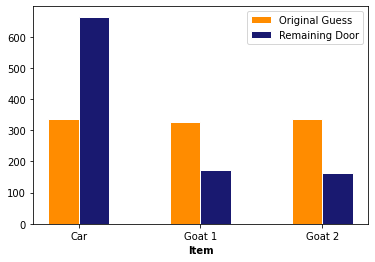

In [26]:
# Let's plot a grouped barplot
import matplotlib.pyplot as plt  

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [original_car,original_g1,original_g2]
bars2 = [remaining_car,remaining_g1,remaining_g2]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='darkorange', width=barWidth, edgecolor='white', label='Original Guess')
plt.bar(r2, bars2, color='midnightblue', width=barWidth, edgecolor='white', label='Remaining Door')
 
# Add xticks on the middle of the group bars
plt.xlabel('Item', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Car', 'Goat 1', 'Goat 2'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


<font color=crimson>__According to the plot, it is statitically beneficial for the players to switch doors because the initial chance for being correct is only 1/3__</font>

#### Example4: What if there were 4 doors and 3 goats?

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

Doors = np.array(["Car","Goat 1","Goat 2","Goat 3"])     #Define a list for objects behind the doors
goats = np.array(["Goat 1" , "Goat 2","Goat 3"])          #Define a list for goats!



In [28]:
def othergoat12(x):         #Define a function to return "the other goat"!
    if x == "Goat 1":
        return "Goat 2"
    elif x == "Goat 2":
        return "Goat 1"
    
def othergoat23(x):         #Define a function to return "the other goat"!
    if x == "Goat 2":
        return "Goat 3"
    elif x == "Goat 3":
        return "Goat 2"
    
def othergoat13(x):         #Define a function to return "the other goat"!
    if x == "Goat 1":
        return "Goat 3"
    elif x == "Goat 3":
        return "Goat 1"
#####################################    
def othergoat123(x):         #Define a function to return "the other goat"!
    if x == "Goat 1":
        return np.random.choice(["Goat 2","Goat 3"])
    elif x == "Goat 2":
        return np.random.choice(["Goat 1","Goat 3"])
    elif x == "Goat 3":
        return np.random.choice(["Goat 1","Goat 2"])

In [29]:
def MHgame():
    #Function to simulate the Monty Hall Game
    #For each guess, return ["the guess","the revealed", "unrevealed1", "unrevealed2"]
    goats = np.array(["Goat 1" , "Goat 2","Goat 3"])
    userguess=np.random.choice(Doors)         #randomly selects a door as userguess
    if userguess == "Goat 1":                          #If the user chooses Goat 1
        revealed = np.random.choice(goats[np.arange(len(goats))!=0])
        unrevealed1 = othergoat23(revealed)
        unrevealed2 = "Car"
        return [userguess, revealed,unrevealed1,unrevealed2]
    if userguess == "Goat 2":                          #If the user chooses Goat 2
        revealed = np.random.choice(goats[np.arange(len(goats))!=1])
        unrevealed1 = othergoat13(revealed)
        unrevealed2 = "Car"
        return [userguess, revealed,unrevealed1,unrevealed2]
    if userguess == "Goat 3":                          #If the user chooses Goat 3
        revealed = np.random.choice(goats[np.arange(len(goats))!=2])
        unrevealed1 = othergoat12(revealed)
        unrevealed2 = "Car"
        return [userguess, revealed,unrevealed1,unrevealed2]
    if userguess == "Car":                          #If the user chooses Car
        revealed = np.random.choice(goats)
        newgoat = goats[goats != revealed]
        unrevealed1 = newgoat[0]
        unrevealed2 = newgoat[1]
        return [userguess, revealed,unrevealed1,unrevealed2]

In [30]:
# Check and see if the MHgame function is doing what it is supposed to do:
for i in np.arange(1):
    a =MHgame()
    print(a)
    print(a[0])
    print(a[1])
    print(a[2])
    print(a[3])

['Car', 'Goat 1', 'Goat 2', 'Goat 3']
Car
Goat 1
Goat 2
Goat 3


In [31]:
c1 = []         #Create an empty list for the userguess
c2 = []         #Create an empty list for the revealed
c3 = []         #Create an empty list for the remaining1
c4 = []         #Create an empty list for the remaining2

for i in np.arange(1000):         #Simulate the game for 1000 rounds - or any other number of rounds you desire
    game = MHgame()
    c1.append(game[0])             #In each round, add the first element to the userguess list
    c2.append(game[1])             #In each round, add the second element to the revealed list
    c3.append(game[2])             #In each round, add the third element to the remaining list1
    c4.append(game[3])             #In each round, add the fourth element to the remaining list2


In [32]:
import pandas as pd
#Create a data frame (gamedf) with 3 columns ("Guess","Revealed", "Remaining") and 1000 (or how many number of rounds) rows
gamedf = pd.DataFrame({'Guess':c1,
                       'Revealed':c2,
                       'Remaining1':c3,
                       'Remaining2':c4})
gamedf

,Guess,Revealed,Remaining1,Remaining2
0,Goat 3,Goat 2,Goat 1,Car
1,Goat 3,Goat 2,Goat 1,Car
2,Goat 1,Goat 3,Goat 2,Car
3,Goat 1,Goat 2,Goat 3,Car
4,Goat 2,Goat 1,Goat 3,Car
...,...,...,...,...
995,Goat 1,Goat 2,Goat 3,Car
996,Car,Goat 1,Goat 2,Goat 3
997,Goat 2,Goat 1,Goat 3,Car
998,Goat 3,Goat 1,Goat 2,Car


In [33]:
# Get the count of each item in the first and (3rd+4th) column
original_car =gamedf[gamedf.Guess == 'Car'].shape[0]
remaining_car =gamedf[gamedf.Remaining1 == 'Car'].shape[0] + gamedf[gamedf.Remaining2 == 'Car'].shape[0]

original_g1 =gamedf[gamedf.Guess == 'Goat 1'].shape[0]
remaining_g1 =gamedf[gamedf.Remaining1 == 'Goat 1'].shape[0] + gamedf[gamedf.Remaining2 == 'Goat 1'].shape[0]

original_g2 =gamedf[gamedf.Guess == 'Goat 2'].shape[0]
remaining_g2 =gamedf[gamedf.Remaining1 == 'Goat 2'].shape[0] + gamedf[gamedf.Remaining2 == 'Goat 2'].shape[0]

original_g3 =gamedf[gamedf.Guess == 'Goat 3'].shape[0]
remaining_g3 =gamedf[gamedf.Remaining1 == 'Goat 3'].shape[0] + gamedf[gamedf.Remaining2 == 'Goat 3'].shape[0]

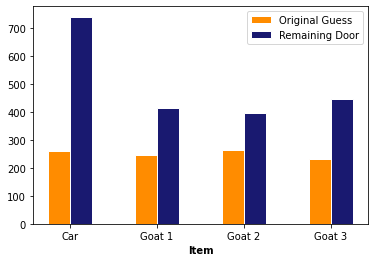

In [34]:
# Let's plot a grouped barplot
import matplotlib.pyplot as plt  

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [original_car,original_g1,original_g2,original_g3]
bars2 = [remaining_car,remaining_g1,remaining_g2,remaining_g3]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='darkorange', width=barWidth, edgecolor='white', label='Original Guess')
plt.bar(r2, bars2, color='midnightblue', width=barWidth, edgecolor='white', label='Remaining Door')
 
# Add xticks on the middle of the group bars
plt.xlabel('Item', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Car', 'Goat 1', 'Goat 2','Goat 3'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


<font color=crimson>__Comparison of the plots show that as the number of doors (and goats) increases, it makes even more sense to switch!__</font>

#### Exercise3: Run the modified Monty Hall game for 10,100, and 1000 rounds. Show the bar plots for each series and explain the difference. 

In [35]:
#Define necessary functions

In [36]:
#Run and plot for 10 rounds

In [37]:
#Run and plot for 100 rounds

In [38]:
#Run and plot for 1000 rounds